In [ ]:
!pip install kaggle

In [2]:
#check if the GPU is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

###Importing Face Mask Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:02<00:00, 62.0MB/s]
100% 163M/163M [00:02<00:00, 71.4MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import requests
from io import BytesIO

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_970.jpg', 'with_mask_697.jpg', 'with_mask_763.jpg', 'with_mask_2698.jpg', 'with_mask_132.jpg']
['with_mask_442.jpg', 'with_mask_471.jpg', 'with_mask_1123.jpg', 'with_mask_2744.jpg', 'with_mask_1982.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3679.jpg', 'without_mask_3533.jpg', 'without_mask_240.jpg', 'without_mask_3049.jpg', 'without_mask_3065.jpg']
['without_mask_2852.jpg', 'without_mask_627.jpg', 'without_mask_2404.jpg', 'without_mask_2817.jpg', 'without_mask_2571.jpg']


In [11]:
len_with_mask = len(with_mask_files)
len_without_mask = len(without_mask_files)
print('Number of with mask images:', len_with_mask)
print('Number of without mask images:', len_without_mask)

Number of with mask images: 3725
Number of without mask images: 3828


###Creating Labels for the two class of Images

with mask -> 1

without mask -> 0

In [12]:
# create the labels
with_mask_labels = [1]*len_with_mask
without_mask_labels = [0]*len_without_mask

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels;
print(len(labels))

7553


###Displaying the Images

In [15]:
# Function to display images
def display_images(image_files, directory, num_images=5):
    plt.figure(figsize=(20, 10))

    for i, file in enumerate(image_files[:num_images]):
        # Load image
        image_path = os.path.join(directory, file)
        image = mpimg.imread(image_path)

        # Display image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(file)

    plt.show()

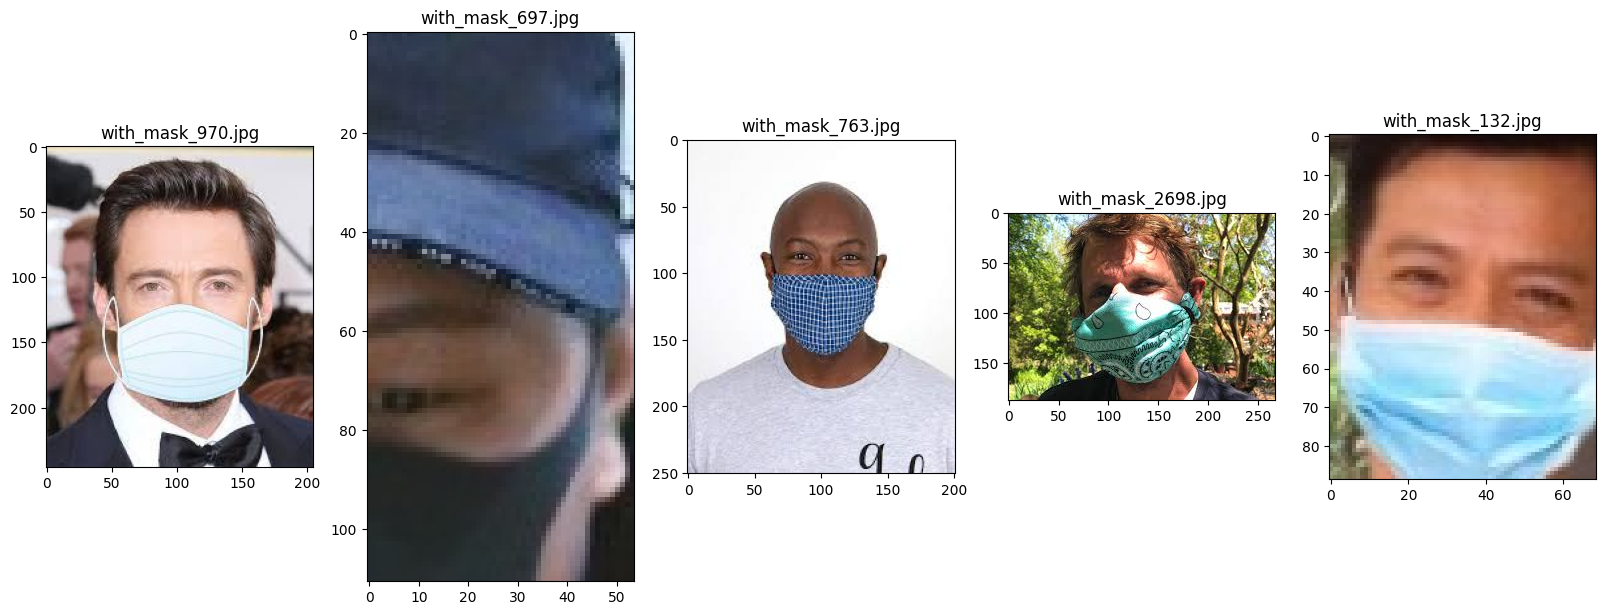

In [16]:
# Display the first 5 with mask images
display_images(with_mask_files, '/content/data/with_mask', num_images=5)

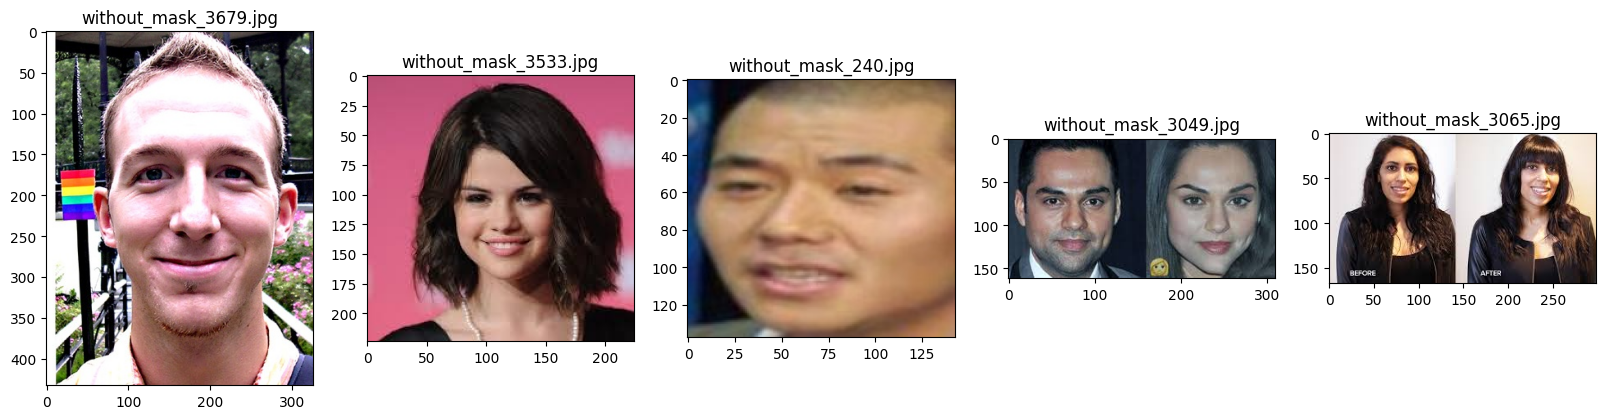

In [17]:
# Display the first 5 without mask images
display_images(without_mask_files, '/content/data/without_mask', num_images=5)

###Image Processing

1. Resize the Images
2. Convert the image to numpy arrays

In [18]:
# covert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

def img_process(origin_path, files):
    data = []
    for img_file in files:
      image_path = origin_path + img_file
      image = Image.open(image_path)
      # img file -> (128,128) size img file
      image = image.resize((128,128))
      # img file -> color img
      image = image.convert('RGB')
      #  img file -> np.array
      image = np.array(image)
      data.append(image)
    return data

with_mask_data = img_process(with_mask_path, with_mask_files)
without_mask_data = img_process(without_mask_path, without_mask_files)
data = with_mask_data + without_mask_data

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
print(type(data))
print(len(data))

<class 'list'>
7553


array([[[228, 214, 186],
        [228, 214, 186],
        [228, 215, 187],
        ...,
        [122, 128, 104],
        [122, 128, 104],
        [122, 128, 104]],

       [[235, 224, 202],
        [235, 225, 202],
        [236, 225, 202],
        ...,
        [185, 183, 155],
        [186, 183, 155],
        [186, 183, 155]],

       [[209, 203, 190],
        [212, 206, 194],
        [219, 212, 199],
        ...,
        [226, 216, 187],
        [226, 216, 187],
        [226, 216, 187]],

       ...,

       [[ 43,  44,  61],
        [ 43,  44,  61],
        [ 43,  43,  61],
        ...,
        [ 42,  42,  52],
        [ 43,  43,  53],
        [ 46,  46,  56]],

       [[ 45,  46,  64],
        [ 45,  46,  64],
        [ 44,  45,  63],
        ...,
        [ 39,  39,  49],
        [ 41,  41,  51],
        [ 44,  44,  54]],

       [[ 47,  48,  66],
        [ 46,  47,  65],
        [ 46,  47,  66],
        ...,
        [ 41,  41,  51],
        [ 43,  43,  53],
        [ 45,  45,  55]]], dtype=uint8)
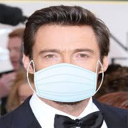

In [20]:
data[0]

In [21]:
X = np.array(data)
y = np.array(labels)

In [22]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


###Train, Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 68,  53,  35],
        [ 70,  55,  35],
        [ 73,  58,  37],
        ...,
        [111,  85,  72],
        [115,  89,  76],
        [117,  91,  78]],

       [[ 71,  55,  36],
        [ 73,  57,  38],
        [ 77,  60,  41],
        ...,
        [102,  77,  63],
        [110,  86,  72],
        [113,  89,  75]],

       [[ 76,  58,  41],
        [ 78,  60,  43],
        [ 81,  63,  46],
        ...,
        [ 97,  72,  59],
        [ 98,  75,  61],
        [ 98,  76,  62]],

       ...,

       [[ 64,  46,  33],
        [ 64,  45,  32],
        [ 64,  45,  31],
        ...,
        [ 23,  19,  16],
        [ 22,  19,  17],
        [ 21,  20,  17]],

       [[ 88,  69,  54],
        [ 87,  67,  53],
        [ 84,  65,  50],
        ...,
        [ 31,  29,  26],
        [ 27,  25,  23],
        [ 24,  24,  22]],

       [[111,  92,  77],
        [109,  90,  75],
        [102,  83,  68],
        ...,
        [ 45,  44,  43],
        [ 37,  36,  34],
        [ 33,  32,  30]]], dtype=uint8)
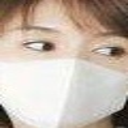

In [26]:
X_train[0]

In [27]:
Y_train[0]

1

In [28]:
X_train_scaled[0]

array([[[0.26666667, 0.20784314, 0.1372549 ],
        [0.2745098 , 0.21568627, 0.1372549 ],
        [0.28627451, 0.22745098, 0.14509804],
        ...,
        [0.43529412, 0.33333333, 0.28235294],
        [0.45098039, 0.34901961, 0.29803922],
        [0.45882353, 0.35686275, 0.30588235]],

       [[0.27843137, 0.21568627, 0.14117647],
        [0.28627451, 0.22352941, 0.14901961],
        [0.30196078, 0.23529412, 0.16078431],
        ...,
        [0.4       , 0.30196078, 0.24705882],
        [0.43137255, 0.3372549 , 0.28235294],
        [0.44313725, 0.34901961, 0.29411765]],

       [[0.29803922, 0.22745098, 0.16078431],
        [0.30588235, 0.23529412, 0.16862745],
        [0.31764706, 0.24705882, 0.18039216],
        ...,
        [0.38039216, 0.28235294, 0.23137255],
        [0.38431373, 0.29411765, 0.23921569],
        [0.38431373, 0.29803922, 0.24313725]],

       ...,

       [[0.25098039, 0.18039216, 0.12941176],
        [0.25098039, 0.17647059, 0.1254902 ],
        [0.25098039, 0

###Building a CNN model

In [29]:
from tensorflow import keras

In [30]:
#class 1 - with mask
#class 0 - without mask
num_of_classes = 2

model = keras.Sequential()

#layer 1
# convolution layer 1
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# pooling layer 1
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#layer 2
# convolution layer 2
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# pooling layer 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# flatten vector
model.add(keras.layers.Flatten())
#layer 3
# Fully connected layer 3
model.add(keras.layers.Dense(128,activation='relu'))
# dropout regularization
model.add(keras.layers.Dropout(0.5))
#layer 4
# Fully connected layer 4
model.add(keras.layers.Dense(64,activation='relu'))
# dropout regularization
model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# binary classificaiton - sigmoid
# multi class classification - softmax

# Here, there are two output
# o/p 1 -> probability of a person wearing a mask
# o/p 2 -> probability of a person has not wearing mask

In [33]:
# compile the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# numerical encoded label - sparse_categorical_crossentropy
# one hot encoded labels - categorical_crossentropy
# One-hot encoding is the representation of categorical variables as binary vectors.

# acc - accuray

In [34]:
# traning the NN
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 146s 850ms/step - loss: 0.4905 - acc: 0.7835 - val_loss: 0.3026 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 142s 834ms/step - loss: 0.2958 - acc: 0.8821 - val_loss: 0.2569 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 142s 835ms/step - loss: 0.2652 - acc: 0.8968 - val_loss: 0.2464 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 143s 841ms/step - loss: 0.2272 - acc: 0.9108 - val_loss: 0.2258 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 144s 847ms/step - loss: 0.1954 - acc: 0.9266 - val_loss: 0.2003 - val_acc: 0.9240


In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 10s 214ms/step - loss: 0.1990 - acc: 0.9226
Test Accuracy =  0.9225678443908691


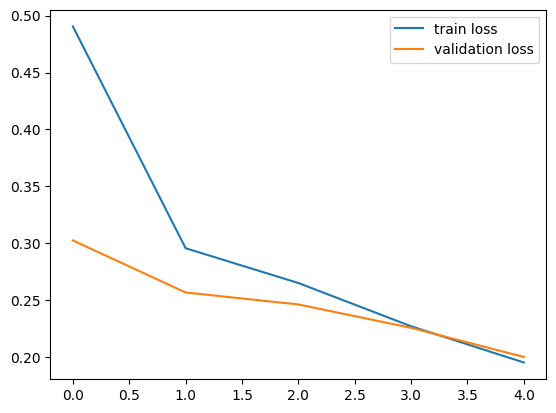

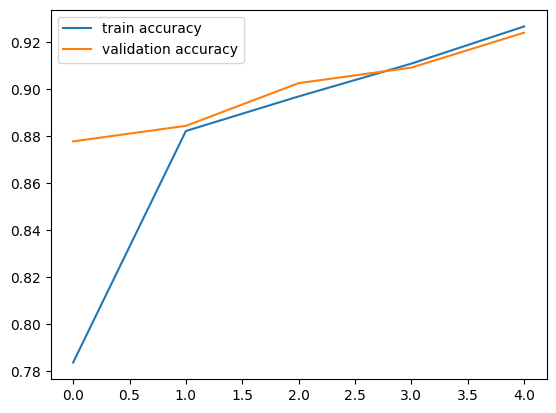

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

###Predictive System

In [39]:
!pip install opencv-python-headless numpy requests

In [42]:
# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_path = "random_image.jpg"
    img.save(img_path)
    return img_path

In [50]:
def predict_face_mask(image_url):
    # Download the image and get the path
    image_path = download_image(image_url)
    # image processing
    input_image = cv2.imread(image_path)
    input_image_resized = cv2.resize(input_image, (128,128))
    cv2_imshow(input_image_resized)
    input_image_scaled = input_image_resized/255
    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
    input_prediction = model.predict(input_image_reshaped)
    # probability of wearing a mask and not wearing a mask
    print(input_prediction)

    # find the class of the image
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    # come to the conclusion
    if input_pred_label == 1:
      print('The person in the image is wearing a mask')
    else:
      print('The person in the image is not wearing a mask')

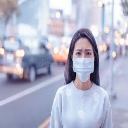

1/1 [==============================] - 0s 37ms/step
[[0.56859815 0.44411668]]
0
The person in the image is not wearing a mask


In [51]:
predict_face_mask('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJvl_eQ27ZWepM7HX_veXbp3NY_YC9MKdlzQ&s')

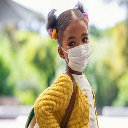

1/1 [==============================] - 0s 35ms/step
[[0.35022148 0.73638153]]
1
The person in the image is wearing a mask


In [52]:
predict_face_mask('https://media.istockphoto.com/id/1308840815/photo/happy-little-black-girl-with-face-mask-ready-to-go-to-elementary-school.jpg?s=612x612&w=0&k=20&c=hwDSQfD_NE1OparHxNmsfTBAdKrLVKnuWvItj_W1xpM=')

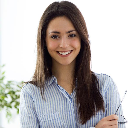

1/1 [==============================] - 0s 32ms/step
[[0.4870832 0.5181617]]
1
The person in the image is wearing a mask


In [53]:
predict_face_mask('https://www.bobbin.lk/wp-content/uploads/2019/02/person2.jpg')

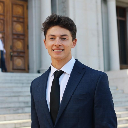

1/1 [==============================] - 0s 31ms/step
[[0.60268563 0.4147351 ]]
0
The person in the image is not wearing a mask


In [54]:
predict_face_mask('https://media.licdn.com/dms/image/D5603AQHxPlwq8aX3VA/profile-displayphoto-shrink_800_800/0/1682664158370?e=2147483647&v=beta&t=UzylExphehf7oNESbrqSYZyyGtHM1s-LC6w_0m_xnW8')

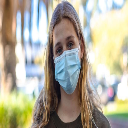

1/1 [==============================] - 0s 30ms/step
[[0.62857956 0.43335927]]
0
The person in the image is not wearing a mask


In [55]:
predict_face_mask('https://www.wa.gov.au/system/files/styles/crop_feature_large/private/2022-07/DoPC_Photoshoot%20AUG%2013th_Young%20Sisters%202%20%28149%20of%20422%291.jpg?itok=QOeDM3W4')